# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Loading

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Step 2: Initial Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Step 3: Data Cleaning

In [6]:
# Check for missing values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
# Calculate the mean of the columns
mean_age = df['Age'].mean()
mean_Height = df['Height'].mean()
mean_Weight = df['Weight'].mean()

# Fill missing values with the mean
df['Age'] = df['Age'].fillna(mean_age)
df['Height'] = df['Height'].fillna(mean_Height)
df['Weight'] = df['Weight'].fillna(mean_Weight)

# Drop missing values
df.dropna(inplace=True)

# Check for missing values
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

11

In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Check for duplicates
df.duplicated().sum()

0

# Step 4: Data Exploration

### Distribution of Numerical Variables

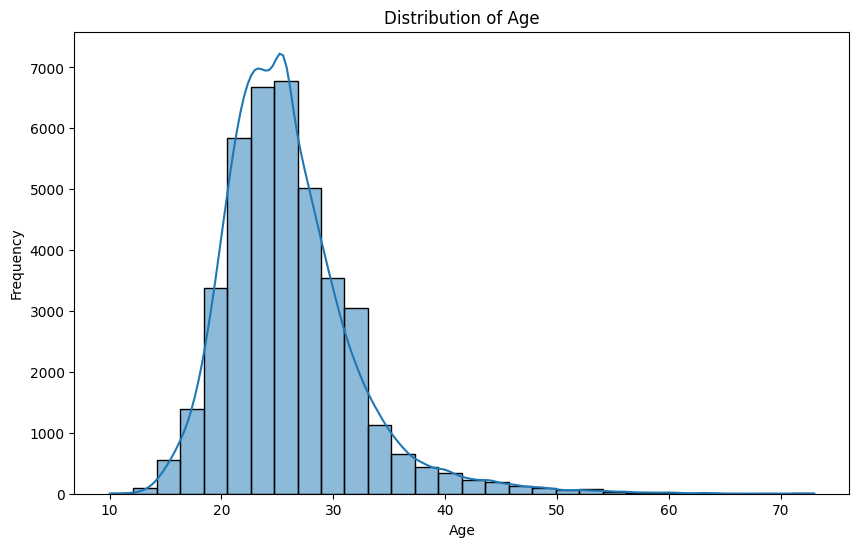

In [10]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

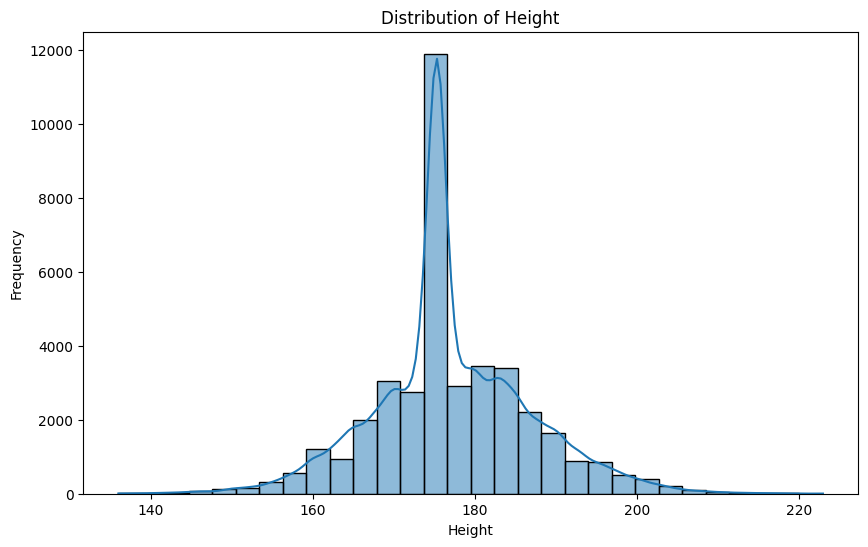

In [11]:
# Distribution of Height
plt.figure(figsize=(10, 6))
sns.histplot(df['Height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

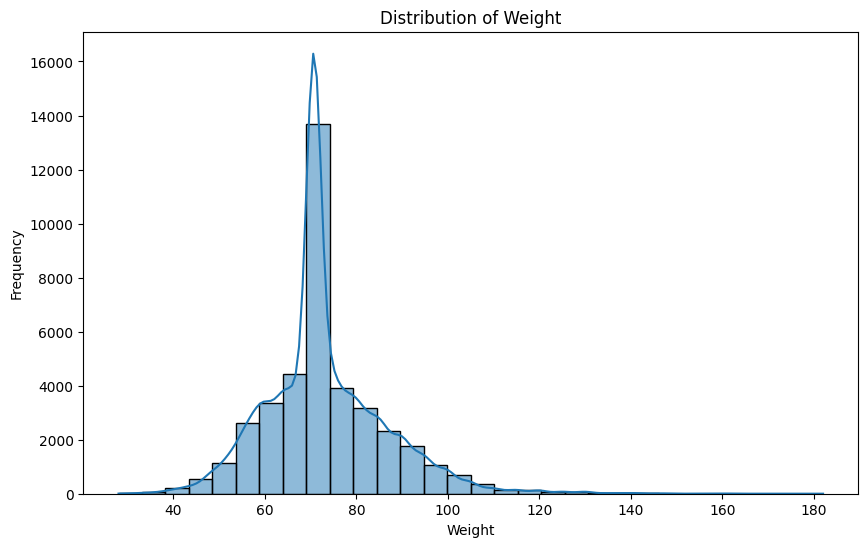

In [12]:
# Distribution of Weight
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

### Categorical Variables

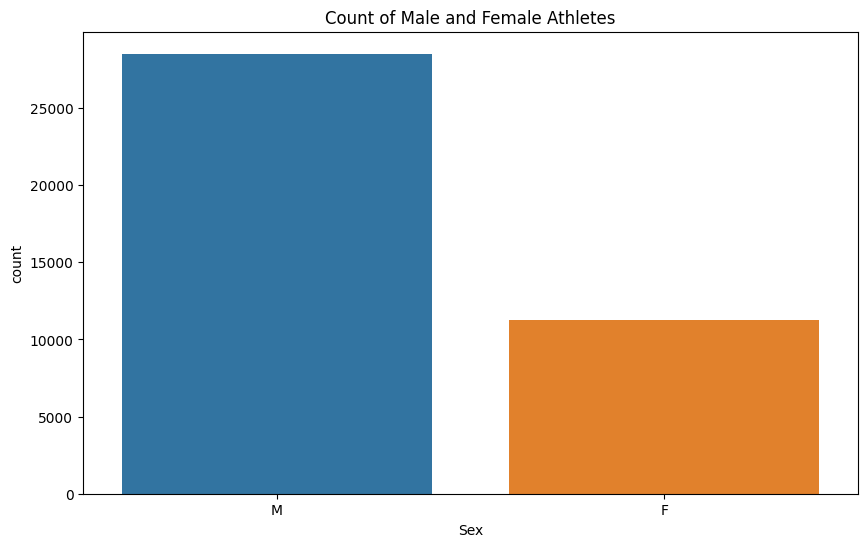

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex')
plt.title('Count of Male and Female Athletes')
plt.show()

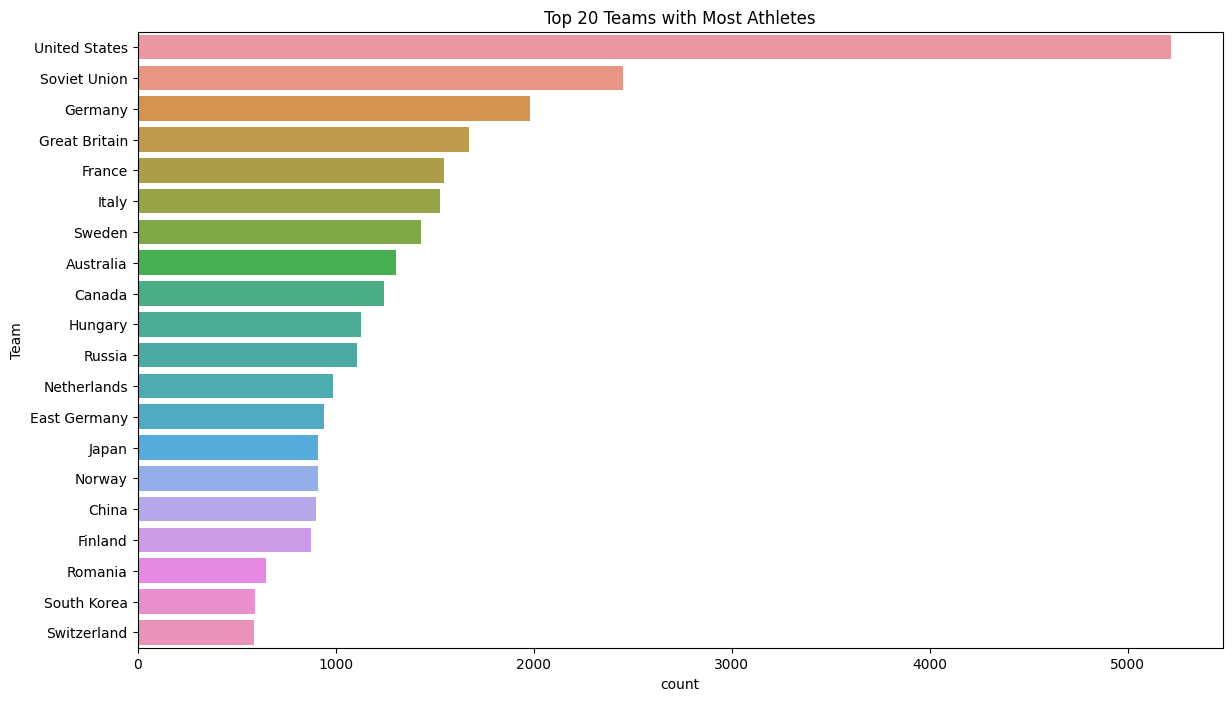

In [14]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Team', order=df['Team'].value_counts().iloc[:20].index)
plt.title('Top 20 Teams with Most Athletes')
plt.show()

### Trends Over Time

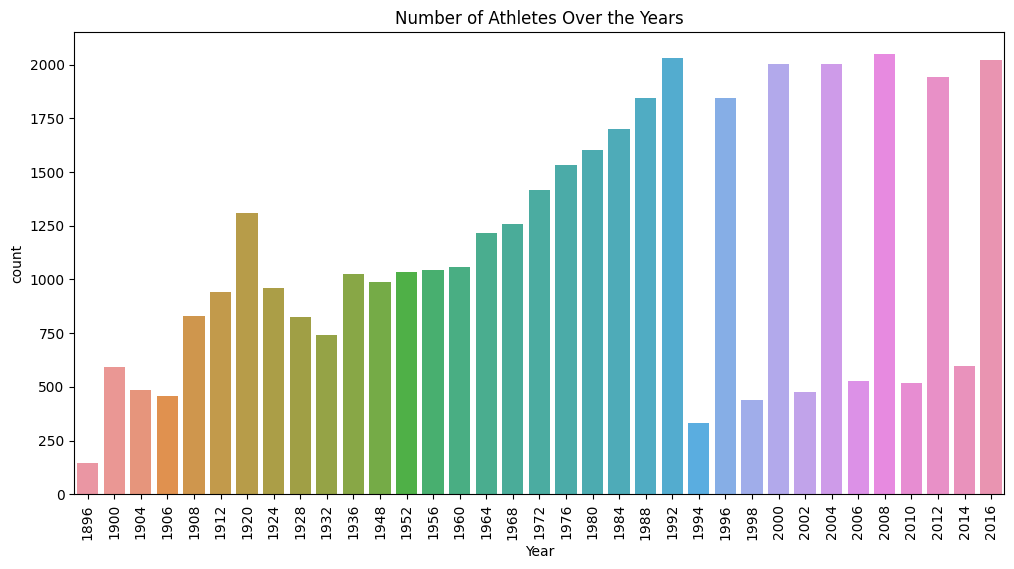

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year')
plt.xticks(rotation=90)
plt.title('Number of Athletes Over the Years')
plt.show()

### Relationship between Height and Weight

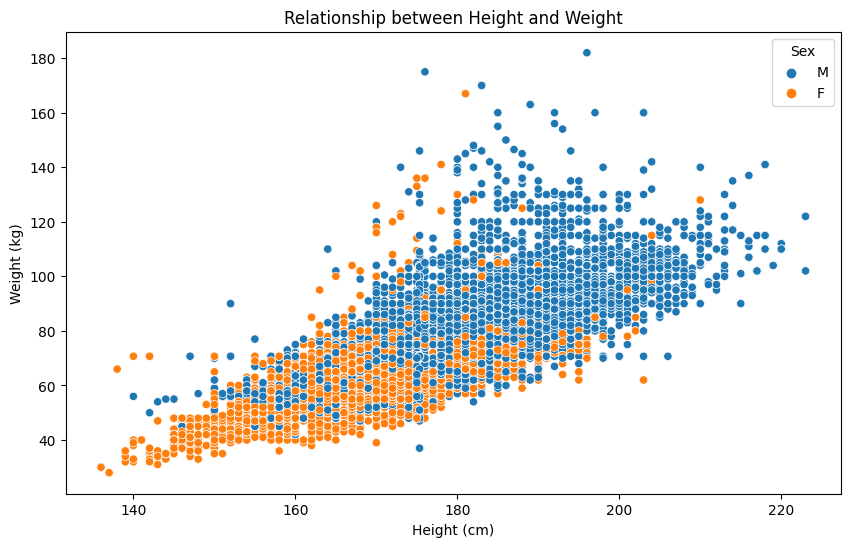

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Sex')
plt.title('Relationship between Height and Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Sex')
plt.show()

### Trends in popular sports over time

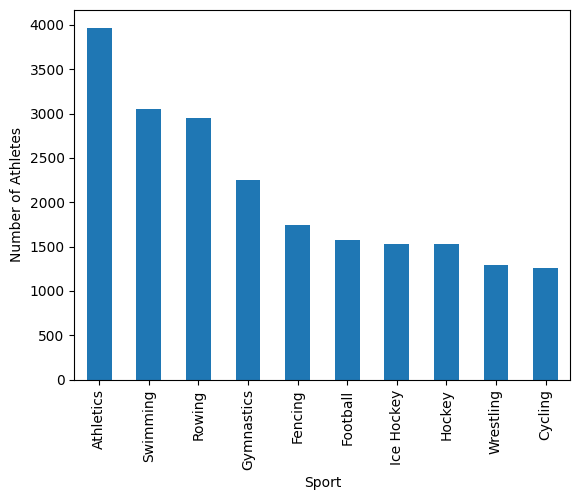

In [17]:
popular_sports = df['Sport'].value_counts().head(10)
popular_sports.plot(kind='bar')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.show()

### Top 10 countries with the highest number of athletes

In [18]:
top_countries = df['NOC'].value_counts().head(10).reset_index()
top_countries.columns = ['NOC', 'Number of Athletes']
fig = px.bar(top_countries, x='NOC', y='Number of Athletes', 
             title='Top 10 Countries with Highest Number of Athletes')
fig.show()

### Box plot showing the distribution of age across different sports

In [ ]:
fig = px.box(df, x='Sport', y='Age', title='Distribution of Age Across Different Sports')
fig.show()

In [ ]:
# Bar chart showing the distribution of athletes by sport and gender
sport_gender_distribution = df.groupby(['Sport', 'Sex']).size().reset_index(name='Count')
fig = px.bar(sport_gender_distribution, x='Sport', y='Count', color='Sex', barmode='group', 
             title='Distribution of Athletes by Sport and Gender')
fig.show()

In [23]:
# Define the labels for the pie chart
labels = ['Gold', 'Silver', 'Bronze']
Medals = df['Medal'].value_counts()

# Define the explode values for the pie chart
explode = [0.05, 0.05, 0.05]

# Define the colors for the pie chart
colors = ['#FFD700', '#C0C0C0', '#CD7F32']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=Medals, 
                             textinfo='percent+label', 
                             marker=dict(colors=colors, line=dict(color='#000000', width=2)), 
                             hole=0.7, 
                             pull=explode)])

# Update layout
fig.update_layout(title='Percentage of Each Medal Awarded at the Rio Olympics')

# Show plot
fig.show()

In [22]:
# Create the choropleth map
fig = px.choropleth(df,
                    locations="NOC",
                    color='Medal',  
                    hover_name="Team",
                    animation_frame="Medal",  
                    color_continuous_scale=px.colors.sequential.Plasma)

# Show plot
fig.show()

# Step 4: Inferences and Insights
- The dataset contains information about athletes' demographics and performance in various Olympic games.
- Most athletes are in the age range of 20-30 years.
- The distribution of height among athletes is approximately normal.
- There are more male athletes compared to female athletes.
- The USA, Soviet Union, and Germany have the highest number of athletes.
- The number of athletes participating in the Olympics has differed over the years.
- There is a positive correlation between height and weight among athletes.
- Athletics seems to be the most popular sport, with a significantly higher number of athletes compared to other sports.
- Swimming and Rowing follow as the second and third most popular sports, respectively.
- The age distribution varies across different sports, indicating that certain sports may attract athletes of different age groups.
- There is variation in the number of male and female athletes across different sports.
- Some sports, such as athletics, swimming, and golf, show a relatively balanced distribution of male and female athletes, indicating broader participation across genders.
- Other sports, such as shooting and wrestling, have a higher proportion of male athletes compared to female athletes, suggesting these sports may be traditionally male-dominated or require physical attributes that are more common among men.
- Conversely, sports like softball has a higher proportion of female athletes.
- The distribution of medals among gold, silver, and bronze categories is relatively balanced, with each category constituting roughly one-third of the total medals awarded. This indicates a fair distribution of achievements across different levels of performance.
- The map provides a visual representation of the number of medals (gold, silver, bronze) won by each country.
- Countries with darker shades indicate higher numbers of medals, while lighter shades represent lower numbers.
- By hovering over each country, users can view additional information such as the country's team name.